In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
intakes = pd.read_csv('aac_intakes.csv')
intakes_outcomes = pd.read_csv('aac_intakes_outcomes.csv')
outcomes = pd.read_csv('aac_outcomes.csv')

   ## Intakes import and datetime conversion

In [2]:

first = intakes['datetime'] = pd.to_datetime(intakes['datetime'])
second = intakes['datetime2'] = pd.to_datetime(intakes['datetime2'])

## Is there an area where more pets are found?

In [3]:
# Filter out cities only
specific = intakes[intakes.found_location.str.contains(' in ')]
# Group the remaining together
specific = specific.groupby(['found_location'])
# Sort the data into ascending
specific = specific.size().sort_values(ascending=False)
# Return first 25. 
specific[:25]

found_location
7201 Levander Loop in Austin (TX)               517
4434 Frontier Trl in Austin (TX)                163
124 W Anderson Ln in Austin (TX)                153
12034 Research Blvd in Austin (TX)               98
1156 W Cesar Chavez in Austin (TX)               98
12034 Research in Austin (TX)                    96
1834 Ferguson in Austin (TX)                     90
1156 W Cesar Chavez St in Austin (TX)            74
4106 N Lamar in Austin (TX)                      71
14811 Chicadee in Pflugerville (TX)              67
4106 N Lamar Blvd in Austin (TX)                 66
7619 Scenic Brook in Austin (TX)                 53
124 West Anderson Lane in Austin (TX)            51
6600 Elm Creek Dr in Austin (TX)                 47
21413 Webber Oaks Cv in Travis (TX)              45
4434 Frontier Trail in Austin (TX)               43
4434 Frontier in Austin (TX)                     41
1156 Cesar Chavez in Austin (TX)                 39
12901 N Ih 35 #1100 in Austin (TX)               

## What is the average number of pets found in a month in the year 2015? Are there months where there is a higher number of animals found?

In [4]:
# Set the date range
fifteen = intakes[intakes['datetime'] >= pd.Timestamp(2015,1,1)]
fifteen = fifteen[fifteen['datetime'] < pd.Timestamp(2016,1,1)]
# Total the intakes
total = fifteen['animal_id'].count()
# Take the total and divide by 12 for average....
average = total / 12
# The number below will average across the montes
print(f'The monthly intake average is {average.round(2)} animals per month')

The monthly intake average is 1559.33 animals per month


The following graph below shows intakes on a month basis based on animal ID
As the Graph shows, there are more intakes in June, May, August, and October


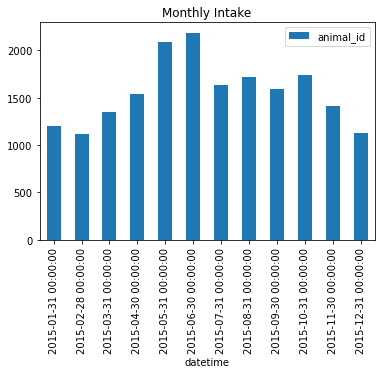

In [5]:
month_breakdown = fifteen.groupby(pd.Grouper(key="datetime", freq="M")).count().plot(kind="bar", title='Monthly Intake', y="animal_id")
print(f'The following graph below shows intakes on a month basis based on animal ID')

print(f'As the Graph shows, there are more intakes in June, May, August, and October')


## What is the ratio of incoming pets vs. adopted pets?


In [6]:
# Get the Total numbers
num1 = intakes['animal_id'].count()
num2 = outcomes['animal_id'].count()
# Do some math
ratio = num2 / num1
# Present the results
print(f'The total incoming pets is {num1}')
print(f'The total number out going pets is {num2}')
print(f'For every pet taken in, {ratio.round(4)} is adopted out.')


The total incoming pets is 80187
The total number out going pets is 80681
For every pet taken in, 1.0062 is adopted out.


## What is the distribution of the types of animals in the shelter?

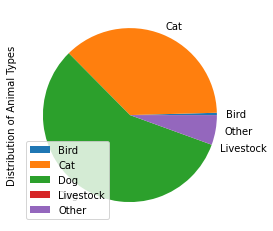

In [39]:
# I am thinking pie chart to show this
distribution = intakes.groupby(['animal_type']).count().plot(kind='pie', y='animal_id', ylabel='Distribution of Animal Types')

## What are the adoption rates for specific breeds?

In [8]:
# Get the doggos
dog_breeds = intakes[intakes['animal_type'] == 'Dog'] 
# Time to group
dog_breeds = dog_breeds.groupby(['breed'])
dog_breeds= dog_breeds.size().sort_values(ascending=False)

# total doggos
total_dogs = dog_breeds.count()

for x in range(5):
    y = x + 1
    print('')
    breeds = dog_breeds[x:y] / total
    print(f'{breeds}')


breed
Pit Bull Mix    0.341065
dtype: float64

breed
Chihuahua Shorthair Mix    0.259726
dtype: float64

breed
Labrador Retriever Mix    0.258711
dtype: float64

breed
German Shepherd Mix    0.104906
dtype: float64

breed
Australian Cattle Dog Mix    0.059053
dtype: float64


## What are the adoption rates for different colorings?

In [9]:
# Lets begin by grouping the colors
colors = intakes.groupby(['color'])
color_list = colors.size().sort_values(ascending=False)
# Remember Total variable from above
print('Below is a list of the most popular colors and their ration of adoption compared to the total')
# List is ugly, but it gives what is needed 
for x in range(5):
    y = x + 1
    print('')
    color = color_list[x:y] / total
    print(f'{color}')

Below is a list of the most popular colors and their ration of adoption compared to the total

color
Black/White    0.445703
dtype: float64

color
Black    0.358593
dtype: float64

color
Brown Tabby    0.239793
dtype: float64

color
Brown    0.193352
dtype: float64

color
White    0.152255
dtype: float64


## About how many animals are spayed/neutered each month?

In [10]:
# First we need the numbers we are looking for
spayed = intakes.groupby(['sex_upon_intake'])
spayed.size().sort_values()
# So I want 23860 + 25488

sex_upon_intake
Unknown           6813
Spayed Female    11231
Neutered Male    12794
Intact Female    23860
Intact Male      25488
dtype: int64

In [32]:
# Setting the numbers as a variable.
males = intakes.loc[intakes['sex_upon_intake'] == 'Intact Male']
females = intakes.loc[intakes['sex_upon_intake'] == 'Intact Female']
total = males.count() + females.count() 
# This gives 49,348
number = total['animal_id']

49348

In [17]:
# Found this function from Stack overflow, posted 12 years ago
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

# First, how many total months
# earliest month
first_month = intakes['datetime'].min()
# Latest month
last_month = intakes['datetime'].max()
months = diff_month(last_month, first_month)
# 53 months is what we are working with

In [38]:
# So 53 months to neuter/spay 49,348 animals. Time for math
# Answer should be 931.094
answer = total / months 
to_present = answer['animal_id'].round(2)
print(f'Approximately {to_present} animals are spayed/neautered each month')

Approximately 931.09 animals are spayed/neautered each month
